In [30]:
import pandas as pd

# Load stock prices data, clean up, and set 'Date' as index
stock_prices = pd.read_excel("Individual_stock_data.xlsx", sheet_name='stock prices').dropna(axis='columns')
stock_prices = stock_prices.set_index('Unnamed: 0')
stock_prices.index = pd.to_datetime(stock_prices.index)

# Load carbon footprint data without modifications
carbon_data = pd.read_excel("Individual_stock_data.xlsx", sheet_name='carbon footprint data')

# Load S&P 500 data and set 'Name' as index
sp500_data = pd.read_excel('Individual_stock_data.xlsx', sheet_name='SP500')
sp500_data.set_index('Name', inplace=True)


In [31]:
stock_prices

,AAPL,MSFT,JPM,JNJ,WMT,BAC,PG,XOM,DIS,T,...,LEG,NWL,JWN,PNR,PBCT,RHI,SEE,FLS,HP,UNM
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1989-12-05,320.44,619.64,477.00,382.85,9096.68,512.75,431.61,1361.55,565.98,420.55,...,646.91,1786.56,3854.85,3257.21,102.55,7583.64,1383.94,1546.32,759.70,180.07
1989-12-12,256.35,589.29,488.96,386.18,9096.68,502.75,449.74,1457.53,565.44,419.65,...,577.97,1725.30,3747.02,3380.12,100.95,7936.37,1375.34,1619.96,790.09,180.07
1989-12-19,249.23,574.11,439.49,373.70,8839.71,475.61,444.79,1429.09,538.18,429.62,...,591.23,1766.14,3666.15,3287.94,97.74,7760.01,1289.38,1570.87,796.16,172.06
1989-12-26,252.79,610.71,450.91,379.52,8916.80,519.89,447.27,1425.54,496.19,455.00,...,612.44,1776.35,3827.90,3287.94,99.34,7995.16,1340.96,1558.59,823.51,176.30
1990-01-02,265.25,633.93,456.61,398.67,9687.71,532.74,464.56,1421.98,503.82,469.50,...,633.65,1960.11,4097.46,3503.03,100.95,8112.74,1418.32,1705.86,838.71,180.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-12,64259.93,233797.60,14527.80,13782.20,297373.40,3493.60,13101.06,20045.43,9921.45,4374.77,...,22053.36,6864.11,28822.43,86795.06,5041.09,422741.20,27323.16,32831.21,9135.34,803.75
2019-11-19,65322.11,239075.40,14687.52,14146.30,299295.70,3477.76,13337.23,19597.54,10623.07,4244.09,...,21407.60,6770.65,27728.90,87116.94,4917.84,432369.00,27060.37,32281.45,8730.73,780.03
2019-11-26,64831.50,242506.30,14810.12,14492.55,297548.30,3521.05,13429.50,19863.38,10856.46,4177.08,...,21561.93,6597.57,29822.23,89430.69,4920.85,433801.30,26676.83,32837.91,8630.72,803.22


In [32]:
carbon_data.rename(columns={'Unnamed: 0': 'Ticker'}, inplace=True)

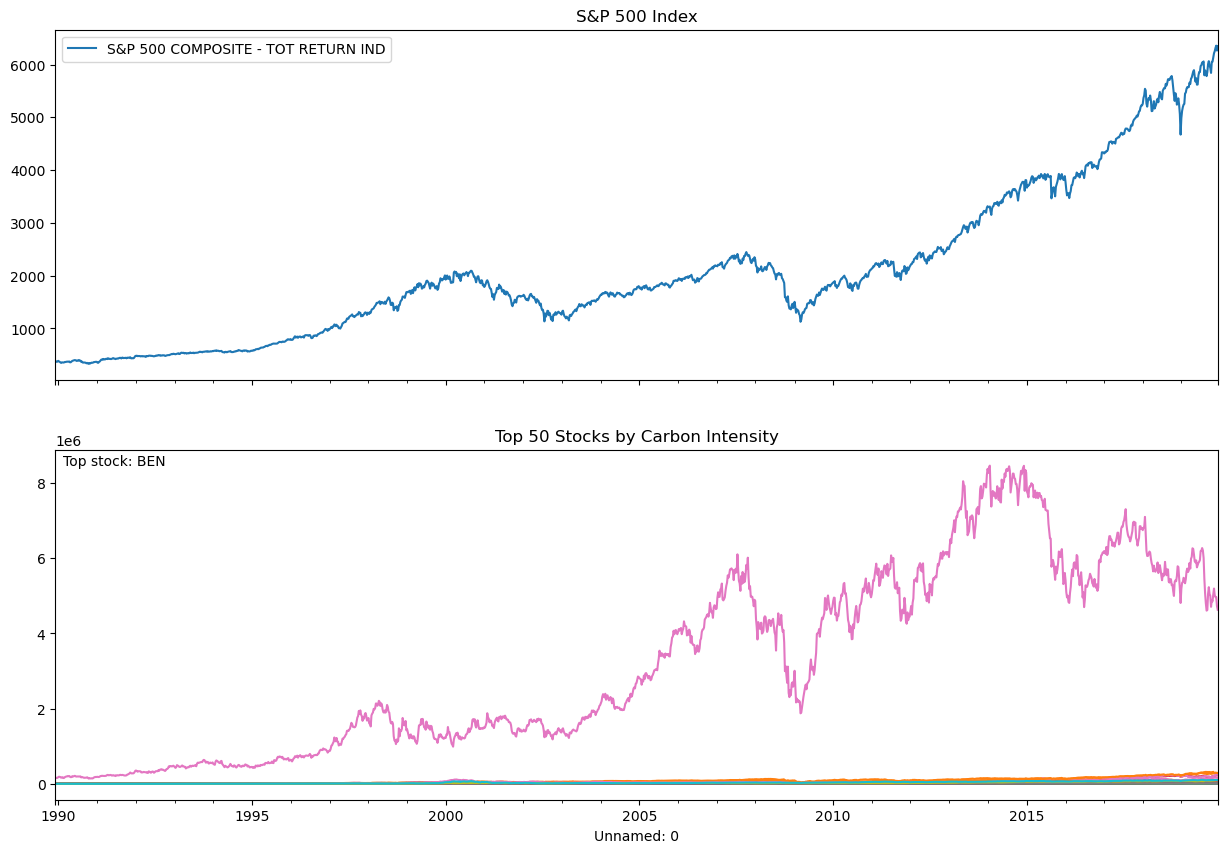

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load top 50 stocks based on carbon intensity
top_stocks = stock_prices.filter(items=list(carbon_data.sort_values("INTENSITY").head(96)['Ticker']), axis=1)

# Create subplots for S&P 500 and selected stocks
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)

# Plot S&P 500 data
sp500_data.plot(ax=axes[0], title='S&P 500 Index')

# Plot top 50 stocks and add a text annotation for the stock with the highest value
top_stocks.plot(ax=axes[1], legend=False, title='Top 50 Stocks by Carbon Intensity')
max_stock = top_stocks.max().idxmax()
axes[1].text(top_stocks.index[10], top_stocks.max().max(), f"Top stock: {max_stock}")

# Display the plots
plt.show()


In [34]:
import numpy as np

def calculate_sharpe_ratio(returns, risk_free, annualization_factor):
    """
    Calculate the Sharpe Ratio for a portfolio of investments.

    Args:
    - returns: Series of investment returns.
    - risk_free: Risk-free rate, typically a treasury bond rate.
    - annualization_factor: Number of periods per year, e.g., 252 for daily returns.

    Returns:
    - The Sharpe Ratio of the investment.
    """

    # Compute average returns and volatility (standard deviation)
    avg_returns = returns.mean()
    volatility = returns.std()

    # Sharpe Ratio formula: (Mean return - Risk-free rate) / (Volatility * sqrt(Annualization factor))
    sharpe = (avg_returns - risk_free) / (volatility * np.sqrt(annualization_factor))

    return sharpe


In [35]:
def calculate_tracking_error(portfolio_returns, benchmark_returns):
    """
    Calculate the tracking error between a portfolio and a benchmark.
    
    Tracking error is the standard deviation of the difference between
    the returns of the portfolio and the benchmark, representing the
    consistency of the portfolio's excess returns over the benchmark.
    
    Args:
    - portfolio_returns: Returns of the portfolio.
    - benchmark_returns: Returns of the benchmark.
    
    Returns:
    - The tracking error as a float.
    """
    
    # Difference in returns
    returns_diff = portfolio_returns - benchmark_returns
    
    # Standard deviation of the difference in returns
    error = returns_diff.std()
    
    return error


In [36]:
import numpy as np

def compute_annualized_volatility(returns, annualization_factor):
    """
    Compute the annualized volatility of a series of returns.
    
    The annualized volatility is calculated as the standard deviation of the returns,
    scaled by the square root of the number of periods in a year, to annualize the metric.
    
    Args:
    - returns: The series of returns for which to compute the volatility.
    - annualization_factor: The number of periods per year (e.g., 252 for daily returns, 12 for monthly returns).
    
    Returns:
    - The annualized volatility of the returns.
    """
    
    # Calculate the standard deviation of the returns
    std_dev_returns = returns.std()
    
    # Annualize the standard deviation by multiplying by the square root of the annualization factor
    annual_volatility = std_dev_returns * np.sqrt(annualization_factor)
    
    return annual_volatility


In [37]:


def compute_returns(dataframe):
    """
    Calculate the weekly returns for each stock in the dataframe.
    
    Args:
    - dataframe: A DataFrame containing stock prices with dates as indices.
    
    Returns:
    - A DataFrame with the original stock prices and their corresponding weekly returns.
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_copy = dataframe.copy()
    
    # Initialize a DataFrame for returns with the same index as the input DataFrame
    returns_df = pd.DataFrame(index=df_copy.index, columns=[f'Return_{col}' for col in df_copy.columns])
    
    # Calculate weekly returns for each stock
    for column in df_copy.columns:
        # Calculate returns, skipping the first date since there's no prior data to compare
        for i in range(1, len(df_copy)):
            previous_week = df_copy.index[i] - pd.DateOffset(days=7)
            current_price = df_copy.at[df_copy.index[i], column]
            previous_price = df_copy.at[previous_week, column]
            returns_df.at[df_copy.index[i], f'Return_{column}'] = (current_price - previous_price) / previous_price
        
        # Set the return for the first date to 0 as there's no prior data
        returns_df.at[df_copy.index[0], f'Return_{column}'] = 0
    
    # Concatenate the original dataframe with the returns dataframe
    result_df = pd.concat([df_copy, returns_df], axis=1)
    
    return result_df


In [38]:
top_stocks = compute_returns(top_stocks)
sp500_data= compute_returns(sp500_data)


In [39]:
# Calculate indicators for S&P 500
sp500_returns = sp500_data['Return_S&P 500 COMPOSITE - TOT RETURN IND']
expected_return = sp500_returns.mean()
annual_volatility = compute_annualized_volatility(sp500_returns, 52)
sharpe = calculate_sharpe_ratio(sp500_returns, 0, 52)
# Tracking error against itself will always be 0, consider comparing against a different benchmark if needed
tracking_err = calculate_tracking_error(sp500_returns, sp500_returns)

# Display the calculated indicators
print(f"Indicators for S&P 500 :\nExpected return = {expected_return}"
      f"\nAnnualized volatility = {annual_volatility}"
      f"\nSharpe ratio = {sharpe}"
      f"\nTracking Error = {tracking_err}")


Indicators for S&P 500 :
Expected return = 0.0020519532180956687
Annualized volatility = 0.15894223942091046
Sharpe ratio = 0.012910056040305882
Tracking Error = 0.0


In [40]:
print(f"Metrics for Unstrategized Portfolio:\n"
      f"Expected Return: {top_stocks.iloc[:, 50:100].mean(axis=1).mean()}\n"
      f"Annualized Volatility: {compute_annualized_volatility(top_stocks.iloc[:, 50:100].mean(axis=1), 52)}\n"
      f"Sharpe Ratio: {calculate_sharpe_ratio(top_stocks.iloc[:, 50:100].mean(axis=1), 0, 52)}\n"
      f"Tracking Error vs S&P 500: {calculate_tracking_error(top_stocks.iloc[:, 50:100].mean(axis=1), sp500_data['Return_S&P 500 COMPOSITE - TOT RETURN IND'])}")


Metrics for Unstrategized Portfolio:
Expected Return: 0.0036114414405884468
Annualized Volatility: 0.201520226832143
Sharpe Ratio: 0.017920987373622847
Tracking Error vs S&P 500: 0.010661608489073897


In [41]:
# Select dates before 1993-01-01
pre_1993_dates = top_stocks.index[top_stocks.index < '1993-01-01']
interval_length = len(pre_1993_dates)
total_intervals = len(top_stocks) // interval_length

print(f"Total Time Intervals: {total_intervals}\nLength of Initial Interval: {interval_length}")

# Set 'ID' as the new index for the carbon footprint DataFrame
carbon_intensity_data = carbon_data.set_index('Ticker')


Total Time Intervals: 9
Length of Initial Interval: 161


In [42]:
import numpy as np

def calculate_interval(index):
    """
    Calculate time intervals based on the index positions within the dataframe.
    
    Args:
    - index: An integer representing the position within the dataframe.
    
    Returns:
    - A Pandas Index representing the calculated time interval.
    """
    initial_interval = top_stocks.index[top_stocks.index < '1993-01-01']
    if index == total_intervals:
        interval = top_stocks.index[top_stocks.index > calculate_interval(total_intervals - 1).max()]
    elif 0 < index < total_intervals:
        start_date = calculate_interval(index - 1).max()
        interval = top_stocks.index[(top_stocks.index > start_date) & (top_stocks.index < start_date + np.timedelta64(interval_length + 1, 'W'))]
    else:
        interval = initial_interval
    return interval


In [43]:
import gurobipy as gp


# Initialize list for optimized weights and a counter
optimized_weights = []
counter = 0
portfolio_weights = {}

# Iterate over the first half of the columns in top_stocks
for column in top_stocks.columns[:len(top_stocks.columns) // 2]:
    for interval_index in range(total_intervals):
        # Create a new Gurobi model
        optimization_model = gp.Model()
        optimization_model.Params.LogToConsole = 0
        weight_variable = optimization_model.addVar(vtype=gp.GRB.CONTINUOUS)

        # Set the objective function to minimize the squared difference in returns
        optimization_model.setObjective(
            gp.quicksum(
                (weight_variable * top_stocks.loc[time, f"Return_{column}"] - sp500_data.loc[time, 'Return_S&P 500 COMPOSITE - TOT RETURN IND'])**2
                for time in calculate_interval(interval_index)
            ) / len(calculate_interval(interval_index)),
            gp.GRB.MINIMIZE
        )

        # Add constraint for carbon footprint
        carbon_constraint = optimization_model.addConstr(
            weight_variable * carbon_intensity_data.loc[column, 'EMISSIONS'] / carbon_intensity_data.loc[column, 'MARKET_VALUE'] <= 
            0.5 * carbon_intensity_data.loc[column, 'CARBON_FOOTPRINT']
        )

        optimization_model.update()
        optimization_model.optimize()
        optimized_weights.append(np.sqrt(weight_variable.x))
    
    # Store the optimized weights for the current column
    portfolio_weights[column] = optimized_weights[counter:]
    counter += total_intervals

print(f"Number of time intervals = {total_intervals}\nSize of first interval = {interval_length}")


Number of time intervals = 9
Size of first interval = 161


In [44]:
# Create a DataFrame from the portfolio weights dictionary
portfolio_weights_df = pd.DataFrame(portfolio_weights)

# Display the first 11 rows of the DataFrame
portfolio_weights_df.head(11)


,AIG,AFL,LNC,UNH,CI,TRV,HUM,UNM,IPG,CAH,...,MDT,VAR,GWW,PCAR,ADP,PKI,AMAT,USB,AMGN,ORCL
0,0.636680,0.516514,0.557629,0.405988,0.554300,0.575886,0.469109,0.503421,0.583816,0.442714,...,0.514488,0.483133,0.526435,0.514405,0.569603,0.523046,0.359704,0.361537,0.390045,0.261947
1,0.496537,0.400928,0.387497,0.294943,0.380772,0.400674,0.281202,0.364904,0.410104,0.308089,...,0.304934,0.376316,0.421804,0.332128,0.491898,0.347479,0.270598,0.435286,0.212837,0.286380
2,0.633026,0.484111,0.623957,0.356561,0.628172,0.610848,0.301852,0.540316,0.657122,0.466422,...,0.532785,0.557162,0.571726,0.507914,0.656873,0.462707,0.389498,0.623811,0.485001,0.398598
3,0.588401,0.430445,0.492082,0.242466,0.386740,0.412460,0.279556,0.297153,0.479901,0.359350,...,0.475028,0.381452,0.444095,0.491822,0.560317,0.366332,0.422930,0.450429,0.426631,0.366092
4,0.678079,0.688296,0.699521,0.475607,0.466187,0.712630,0.455309,0.440822,0.515357,0.557675,...,0.694727,0.561358,0.730161,0.670365,0.729358,0.400598,0.534289,0.800839,0.610175,0.599072
5,0.545640,0.590912,0.622945,0.314447,0.362863,0.640994,0.245159,0.500831,0.450329,0.474743,...,0.412672,0.386302,0.525808,0.547693,0.621256,0.475102,0.387737,0.643667,0.372008,0.507774
6,0.255651,0.524947,0.458767,0.548760,0.518530,0.711440,0.531982,0.642568,0.487031,0.692530,...,0.652094,0.634701,0.770577,0.650466,0.883056,0.599010,0.671857,0.506049,0.575603,0.741872
7,0.643356,0.647900,0.597270,0.538101,0.581361,0.748226,0.429086,0.732785,0.552520,0.652096,...,0.774471,0.628016,0.662366,0.675552,0.874760,0.616493,0.612133,0.751964,0.572415,0.629781
8,0.697652,0.778679,0.537979,0.649012,0.530163,0.733288,0.412009,0.592012,0.630474,0.563925,...,0.649030,0.658324,0.484695,0.604571,0.628243,0.650642,0.509874,0.725474,0.596342,0.651969


Text(0.5, 0, 'Number of Time Intervals')

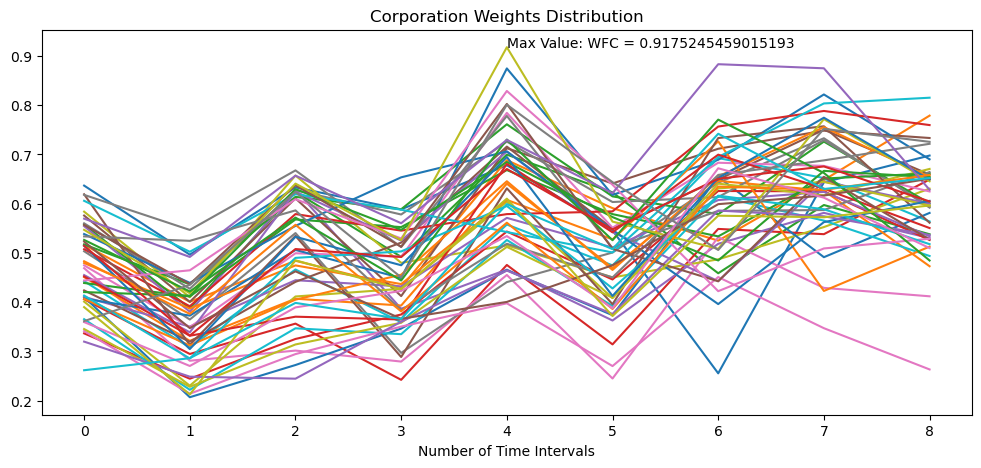

In [45]:
# Plotting the corporation weights without legend and setting the figure size
plot_axis = portfolio_weights_df.plot(legend=False, title='Corporation Weights Distribution', figsize=(12, 5))

# Annotating the maximum value on the plot
max_value = portfolio_weights_df.max().max()
max_value_corporation = portfolio_weights_df.max(axis=0).idxmax()
plot_axis.text(4, max_value, f"Max Value: {max_value_corporation} = {max_value}")

# Setting the x-axis label
plot_axis.set_xlabel("Number of Time Intervals")


In [46]:
%%time
# Calculate and add a new column for portfolio returns based on a tracking error strategy
for timestamp in top_stocks.index:
    # Compute the weighted return for each corporation at the given timestamp
    weighted_returns = sum(portfolio_weights_df[col].mean() * top_stocks.loc[timestamp, f"Return_{col}"] for col in portfolio_weights_df.columns) / len(portfolio_weights_df.columns)
    top_stocks.loc[timestamp, "Portfolio Returns - TE Strategy"] = weighted_returns


CPU times: total: 6.12 s
Wall time: 14.1 s


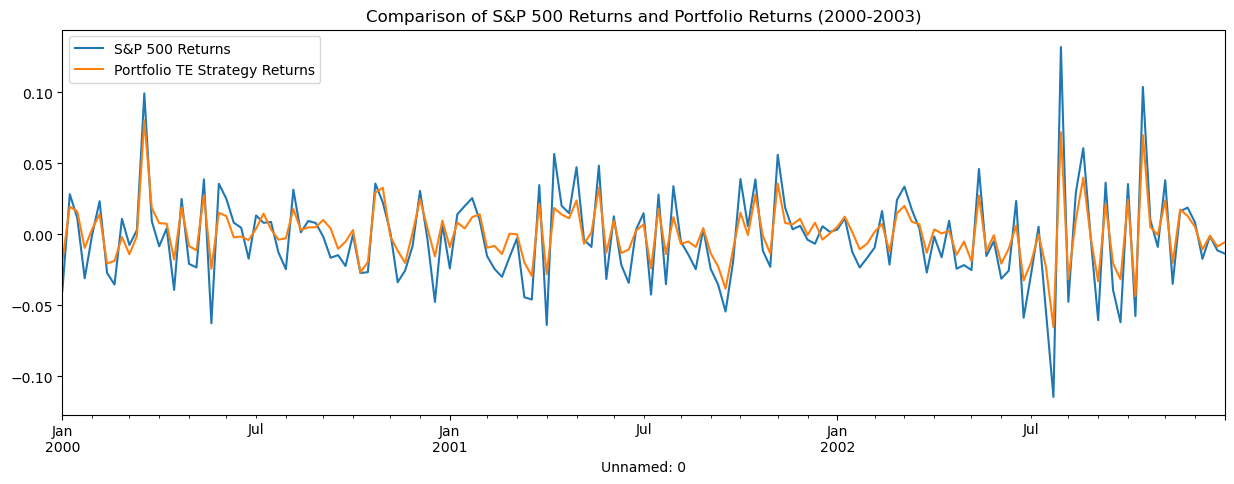

In [47]:
# Setting up the plot with specified dimensions
figure, axis = plt.subplots(1, 1, figsize=(15, 5))

# Plotting S&P 500 returns within the 2000 to 2003 timeframe
sp500_data[(sp500_data.index < '2003') & (sp500_data.index > '2000')].plot(
    y='Return_S&P 500 COMPOSITE - TOT RETURN IND', ax=axis, label='S&P 500 Returns'
)

# Plotting portfolio returns with tracking error strategy within the same timeframe
top_stocks[(top_stocks.index < '2003') & (top_stocks.index > '2000')].plot(
    y='Portfolio Returns - TE Strategy', ax=axis, label='Portfolio TE Strategy Returns'
)

# Enhancing the plot with titles and legends
axis.set_title('Comparison of S&P 500 Returns and Portfolio Returns (2000-2003)')
axis.legend()

# Displaying the plot
plt.show()


In [48]:
print(f"Portfolio Performance Metrics:\n"
      f"Expected Return: {top_stocks['Portfolio Returns - TE Strategy'].mean()}\n"
      f"Annualized Volatility: {compute_annualized_volatility(top_stocks['Portfolio Returns - TE Strategy'], 52)}\n"
      f"Sharpe Ratio: {calculate_sharpe_ratio(top_stocks['Portfolio Returns - TE Strategy'], 0, 52)}\n"
      f"Tracking Error vs. S&P 500: {calculate_tracking_error(top_stocks['Portfolio Returns - TE Strategy'], sp500_data['Return_S&P 500 COMPOSITE - TOT RETURN IND'])}")


Portfolio Performance Metrics:
Expected Return: 0.001856505769364002
Annualized Volatility: 0.10528583292093245
Sharpe Ratio: 0.017633006434571313
Tracking Error vs. S&P 500: 0.00980239036598955


In [49]:
# Extracting the returns matrix from the second half of the top_stocks columns
returns_matrix = np.transpose(top_stocks.iloc[:, len(top_stocks.columns) // 2:100])
returns_matrix.to_csv("a.csv")



In [50]:

file_path = 'a.csv'
returns_matrix= pd.read_csv(file_path)

# Dropping the 'Unnamed: 0' column as it seems to be an identifier
returns_matrix = returns_matrix.drop(columns=['Unnamed: 0'])
returns_matrix = returns_matrix.transpose()
# Calculating the covariance matrix without transposing the DataFrame, treating each column as a variable
cov_matrix = np.cov(returns_matrix, rowvar=False)



In [51]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint

# Number of assets in the portfolio
num_stocks = 50

# Objective function to minimize: portfolio variance
def minimize_variance(weights, covariance_matrix):
    return np.dot(weights.T, np.dot(covariance_matrix, weights))

# Initial guess for the weights: equal distribution
initial_weights = np.ones(num_stocks) / num_stocks

# Constraint: weights sum to 1
sum_weights_constraint = LinearConstraint(np.ones(num_stocks), lb=1, ub=1)

# Constraint: reduce carbon footprint by 50%
emissions_market_ratio = carbon_intensity_data.loc[top_stocks.columns[:num_stocks], 'EMISSIONS'] / carbon_intensity_data.loc[top_stocks.columns[:num_stocks], 'MARKET_VALUE']
carbon_footprint_constraint = LinearConstraint(emissions_market_ratio - 0.5 * carbon_intensity_data.loc[top_stocks.columns[:num_stocks], 'CARBON_FOOTPRINT'], ub=[0])

# Optimization solution
optimal_solution = minimize(minimize_variance, initial_weights, args=(cov_matrix,), constraints=[sum_weights_constraint, carbon_footprint_constraint], bounds=[(0, 1)] * num_stocks)

# Extracting optimal weights
optimal_weights = optimal_solution.x

# Displaying optimal weights
print("Optimal Portfolio Weights:", optimal_weights)


Optimal Portfolio Weights: [0.00000000e+00 1.83768392e-02 1.52754784e-18 2.16936377e-02
 2.11399412e-02 5.04044773e-02 1.81583884e-02 1.26864395e-18
 2.00705880e-04 5.28501750e-02 1.23545005e-02 5.02593530e-02
 9.09343277e-19 2.86271216e-18 5.37858515e-19 1.88220031e-18
 5.25026084e-19 4.25602673e-03 2.03510778e-02 1.85788720e-19
 7.22869213e-02 0.00000000e+00 4.91434259e-19 2.72135233e-02
 0.00000000e+00 6.35906469e-02 3.73975194e-18 5.08337073e-02
 3.57628591e-19 4.49481042e-02 3.61625260e-18 3.97744521e-02
 2.03175737e-19 4.47003403e-02 2.74792075e-18 4.87915509e-18
 0.00000000e+00 5.82235329e-02 2.35255232e-18 4.51464030e-19
 4.96662547e-02 5.17827630e-02 4.80431805e-02 0.00000000e+00
 6.03730345e-02 4.22940824e-02 8.28654922e-19 2.73416115e-02
 4.88827223e-02 4.84339045e-19]


In [52]:
# Convert optimal weights to a DataFrame
optimal_weights_df = pd.DataFrame(optimal_weights)

# Initialize a new column for portfolio returns based on the variance strategy
top_stocks["Variance Strategy Returns"] = ""

# Iterate over the DataFrame to calculate returns
for index in range(len(top_stocks)):
    # Calculate the weighted return for each stock and sum them up
    top_stocks.iloc[index, 101] = sum(optimal_weights_df.iloc[stock, 0] * top_stocks.iloc[index, stock + len(top_stocks.columns)//2 - 1] for stock in range(num_stocks))


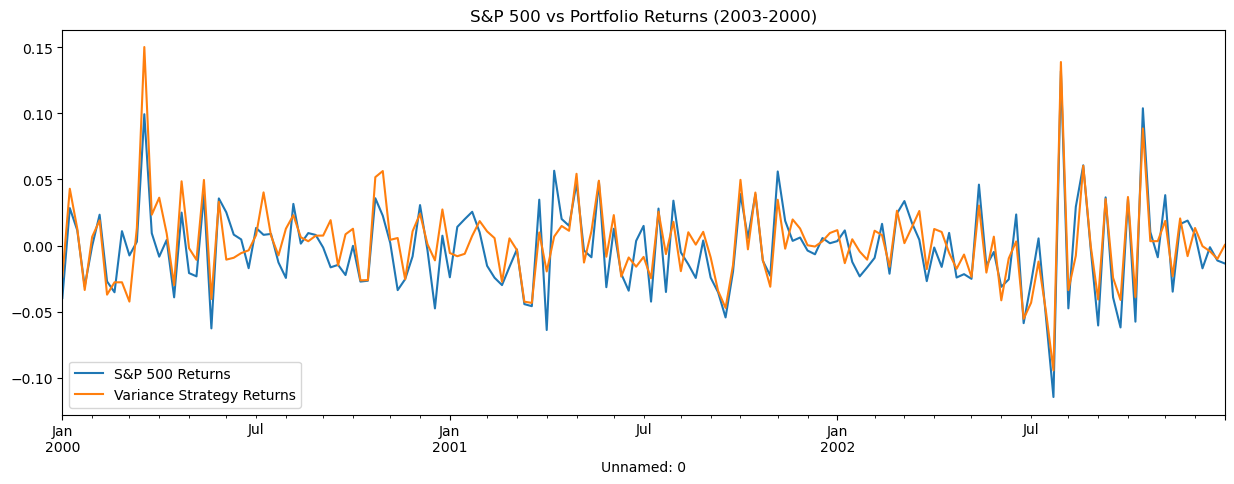

In [53]:
# Setup the plot with specified dimensions
figure, axis = plt.subplots(1, 1, figsize=(15, 5))

# Plot S&P 500 returns for the years 2000 to 2003
sp500_data[(sp500_data.index < '2003') & (sp500_data.index > '2000')].plot(
    y='Return_S&P 500 COMPOSITE - TOT RETURN IND', ax=axis, label='S&P 500 Returns'
)


# Plot portfolio returns using the variance strategy for the same time frame
top_stocks[(top_stocks.index < '2003') & (top_stocks.index > '2000')].plot(
    y='Variance Strategy Returns', ax=axis, label='Variance Strategy Returns'
)

# Enhancing the plot with a title and legend
axis.set_title('S&P 500 vs Portfolio Returns (2003-2000)')
axis.legend()

# Display the plot
plt.show()


In [54]:
print(
    f"Performance Metrics (Variance Strategy):\n"
    f"Expected Return: {top_stocks['Variance Strategy Returns'].mean()}\n"
    f"Annualized Volatility: {compute_annualized_volatility(top_stocks['Variance Strategy Returns'], 52)}\n"
    f"Sharpe Ratio: {calculate_sharpe_ratio(top_stocks['Variance Strategy Returns'], 0, 52)}\n"
    f"Tracking Error vs. S&P 500: {calculate_tracking_error(top_stocks['Variance Strategy Returns'], sp500_data['Return_S&P 500 COMPOSITE - TOT RETURN IND'])}"
)


Performance Metrics (Variance Strategy):
Expected Return: 0.0033161136925791345
Annualized Volatility: 0.15675233915270745
Sharpe Ratio: 0.02115511456163082
Tracking Error vs. S&P 500: 0.010233572036835665


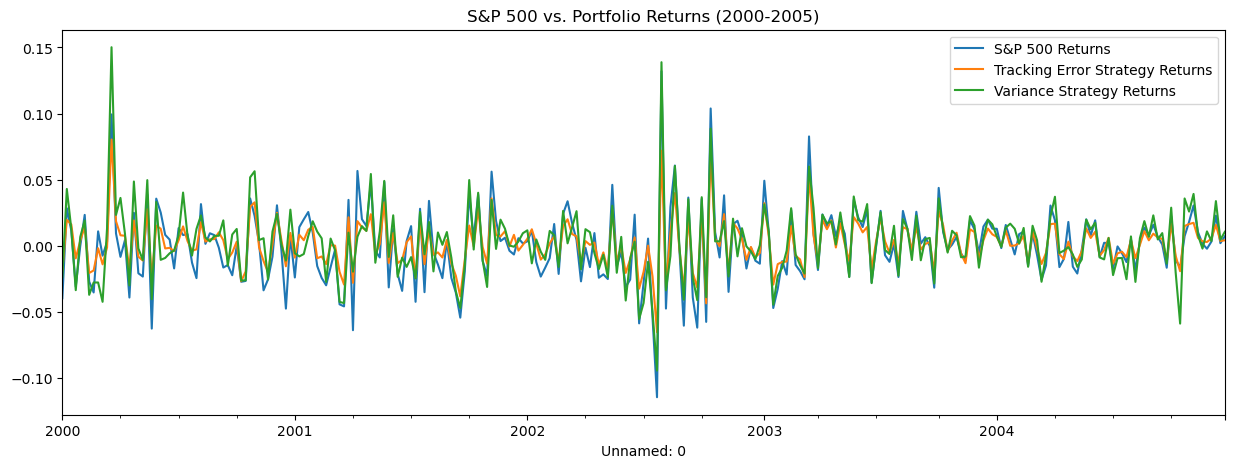

In [55]:
# Setup the figure and axis for plotting
figure, axis = plt.subplots(1, 1, figsize=(15, 5))

# Plotting S&P 500 returns for the period 2000 to 2005
sp500_data[(sp500_data.index < '2005') & (sp500_data.index > '2000')].plot(y='Return_S&P 500 COMPOSITE - TOT RETURN IND', ax=axis, label='S&P 500 Returns')

# Plotting portfolio returns based on the tracking error strategy for the same period
top_stocks[(top_stocks.index < '2005') & (top_stocks.index > '2000')].plot(y='Portfolio Returns - TE Strategy', ax=axis, label='Tracking Error Strategy Returns')

# Plotting portfolio returns based on the variance minimization strategy for the same period
top_stocks[(top_stocks.index < '2005') & (top_stocks.index > '2000')].plot(y='Variance Strategy Returns', ax=axis, label='Variance Strategy Returns')

# Enhancing the plot with a title and a legend
axis.set_title('S&P 500 vs. Portfolio Returns (2000-2005)')
axis.legend()

# Display the plot
plt.show()
